Lets see what we can do with a wordmap (plot, noise reduction and possibly partitioning into morphemes?)

In [2]:
import wordmapper
import text_utilities as tu
import numpy as np # arrays
import scipy.stats as stats # arithmetics
import matplotlib.pyplot as pp # plotting
%load_ext autoreload
%autoreload 2

In [3]:
pc = tu.PosCorpus('D:\Dateien\Entwicklung\BATex\wsm-tokenizer\data\experiment')

target = "ernten"

wm = wordmapper.WordMapper(target, pc.counted_corpus)
mt = wordmapper.MapToken(wm.target, wm.wordmap, pc.metrics)
print(mt.token, mt.wordmap)

ernten []


([<matplotlib.axis.XTick at 0x7faf69c17190>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

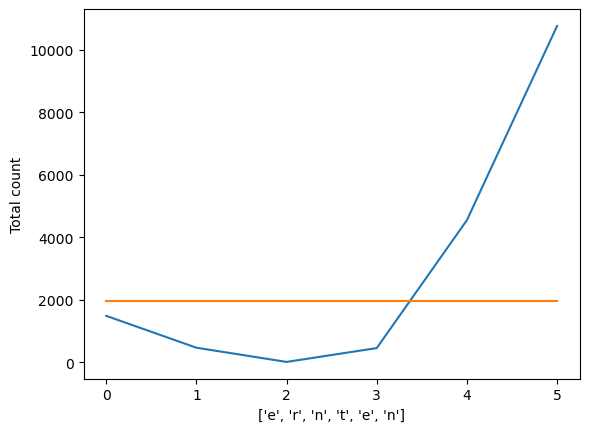

In [56]:
# PLOT FREQUENCY MAP FOR WORD
wordmap1 = mt.wordmap
threshold_values = mt.wordmap



arr = np.array(wordmap1)
threshold_std = np.array([np.std(wordmap1) for i in wordmap1])
threshold_mea = np.array([np.mean(wordmap1) for i in wordmap1])
threshold_med = np.array([np.median(wordmap1) for i in wordmap1])
threshold_mix = [(x+y)/2 for x, y, in zip(threshold_mea, threshold_med)]

pp.plot(range(len(arr)), arr)
#pp.plot(range(len(arr)), threshold_mea)
#pp.plot(range(len(arr)), threshold_med)
pp.plot(range(len(arr)), threshold_mix)

pp.ylabel('Total count')
pp.xlabel(list(mt.token))
pp.xticks(np.arange(stop=len(arr),step=1))

In [44]:
def signaltonoise(a, axis=0, ddof=0):
    """
    The signal-to-noise ratio of the input data.
    Returns the signal-to-noise ratio of `a`, here defined as the mean
    divided by the standard deviation.
    Parameters
    ----------
    a : array_like
        An array_like object containing the sample data.
    axis : int or None, optional
        Axis along which to operate. Default is 0. If None, compute over
        the whole array `a`.
    ddof : int, optional
        Degrees of freedom correction for standard deviation. Default is 0.
    Returns
    -------
    s2n : ndarray
        The mean to standard deviation ratio(s) along `axis`, or 0 where the
        standard deviation is 0.
    """
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

([<matplotlib.axis.XTick at 0x7faf67be5e10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

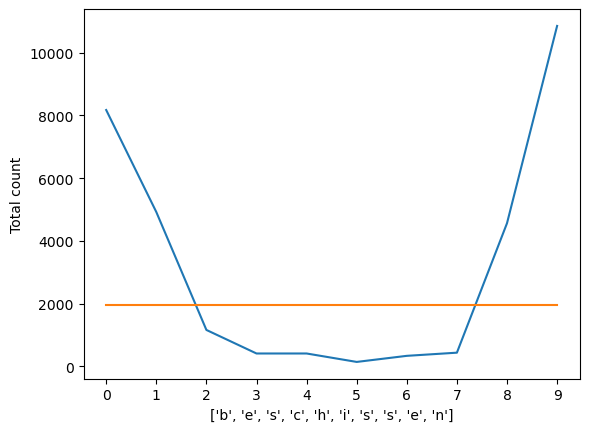

In [52]:
print(signaltonoise(wordmap1))

0.6054367328205298


In [27]:
S = np.fft.fft(mt.wordmap)

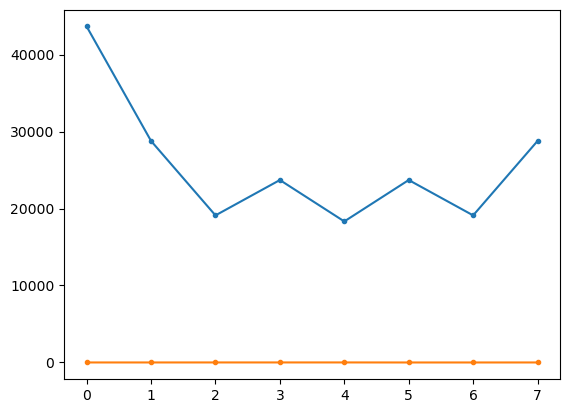

In [28]:
t = np.arange(8)
#s = np.sin(0.15*2*np.pi*t)

S_mag = np.abs(S)
S_phase = np.angle(S)
pp.plot(t,S_mag,'.-')
pp.plot(t,S_phase,'.-')

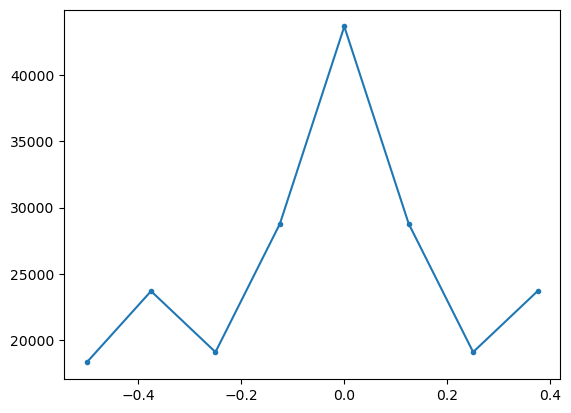

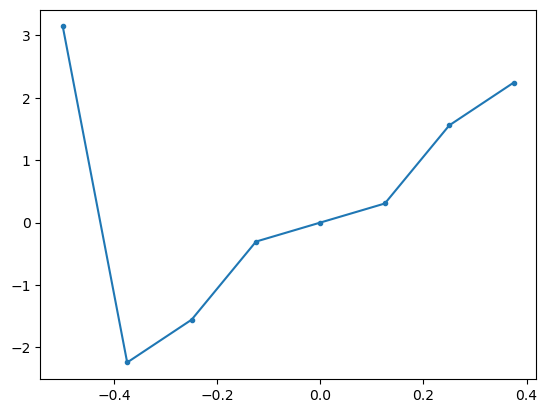

In [30]:
Fs = 1 # Hz
N = 8 # number of points to simulate, and our FFT size

t = np.arange(N) # because our sample rate is 1 Hz

S = np.fft.fftshift(np.fft.fft(mt.wordmap))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
pp.figure(0)
pp.plot(f, S_mag,'.-')
pp.figure(1)
pp.plot(f, S_phase,'.-')
pp.show()